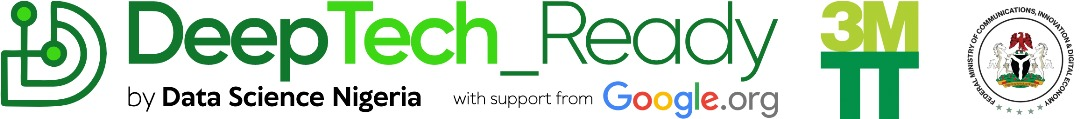

# Sentiment Analysis using LSTM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

**Loading the Dataset**

In [ ]:
data = pd.read_csv('IMDB Dataset.csv')

In [ ]:
data.shape

(50000, 2)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [ ]:
data.replace({'sentiment': {'positive': 1, 'negative': 0}}, inplace=True)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
data['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [ ]:
#split data into training data and test data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


**Data Preprocessing**

In [ ]:
# Tokenize test data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['review'])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['review']), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['review']), maxlen=200)

In [ ]:
print(X_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [ ]:
print(X_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [ ]:
Y_train = train_data['sentiment']
Y_test = test_data['sentiment']

In [ ]:
print(Y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


**LSTM - Long Short-Term Memory**

In [ ]:
# build the model

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          640000    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 771,713
Trainable params: 771,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Training the Model**

In [ ]:
model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 [==============================] - 471s 933ms/step - loss: 0.4044 - accuracy: 0.8155 - val_loss: 0.3043 - val_accuracy: 0.8709
Epoch 2/5
500/500 [==============================] - 498s 997ms/step - loss: 0.2792 - accuracy: 0.8897 - val_loss: 0.3062 - val_accuracy: 0.8766
Epoch 3/5
500/500 [==============================] - 492s 984ms/step - loss: 0.2336 - accuracy: 0.9075 - val_loss: 0.2999 - val_accuracy: 0.8777
Epoch 4/5
500/500 [==============================] - 476s 952ms/step - loss: 0.1944 - accuracy: 0.9262 - val_loss: 0.3373 - val_accuracy: 0.8786
Epoch 5/5
500/500 [==============================] - 476s 951ms/step - loss: 0.1676 - accuracy: 0.9369 - val_loss: 0.3465 - val_accuracy: 0.8761


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 [==============================] - 32s 101ms/step - loss: 0.3323 - accuracy: 0.8787
Test Loss: 0.33227381110191345
Test Accuracy: 0.8787000179290771


In [ ]:
# Predict and evaluate using confusion matrix
Y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", cm)

313/313 [==============================] - 31s 100ms/step
Confusion Matrix:
 [[4443  518]
 [ 695 4344]]


In [ ]:
# Performance metrics
report = classification_report(Y_test, Y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.90      0.88      4961
    Positive       0.89      0.86      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



**Building a Predictive System**

In [ ]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = 'positive' if prediction[0][0] > 0.5 else 'negative'
  return sentiment

In [ ]:
# example usage
new_review = 'This movie was fantastic. I loves it.'
sentiment = predict_sentiment(new_review)
print(f'The sentiment of the review is: {sentiment}')

1/1 [==============================] - 0s 86ms/step
The sentiment of the review is: positive


In [ ]:
new_review = 'This Movie was not that good'
sentiment = predict_sentiment(new_review)
print(f'The sentiment of the review is: {sentiment}')

1/1 [==============================] - 0s 77ms/step
The sentiment of the review is: negative


In [ ]:
new_review = 'This movie was ok but not that good.'
sentiment = predict_sentiment(new_review)
print(f'The sentiment of the review is: {sentiment}')

1/1 [==============================] - 0s 83ms/step
The sentiment of the review is: negative


**End**